# Imports

In [104]:
# This magic command clears any saved variables
# When this cell is executed, all variables and their values are deleted, so be careful.
%reset -f

In [105]:
# add all necessary imports in this cell
# define all constants (is any are used) after the imports in this cell

import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We are introducing "seaborn" today
# It's a plotting wrapper library around matplotlib
# making it easier to use
import seaborn as sns


# The Python library "sklearn" / "scikit-learn"
# has built-in functionality for feature selection
from sklearn.feature_selection import mutual_info_classif, chi2

# Data dictionary for the `Titanic` dataset

- `PASSENGERID` => Id of passenger
- `SURVIVED`    => Whether passenger survived
- `PCLASS`      => Ticket class
- `NAME`        => Name
- `SEX`         => Gender
- `AGE`         => Age of passenger
- `SIBSP`       => # of siblings and/or spouses aboard
- `PARCH`       => # of parents and/or children aboard
- `TICKET`      => Ticket number
- `FARE`        => Cost of ticket
- `CABIN`       => Cabin number
- `EMBARKED`    => Port of Embarkation

# Load data

In [106]:
# In the GitHub repo, in the "DATA" folder there are two ".csv" files called
# "titanic_train.csv" and "titanic_test.csv".
# Load them, display each of them, concatenate them
# into a new variable called "df_titanic"
# and display the contents of "df_titanic".
# Make sure the index of "df_titanic" starts from 0 and ends with 1,781.

# Note: When loading files from GitHub, make sure to use
# the "raw" version of the data (the link should contain
# "raw.githubusercontent.com").

df_train = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/titanic_train.csv')
df_train['split'] = 'Train'
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Train


In [107]:
df_test = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/titanic_test.csv')
df_test['split'] = 'Test'
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [108]:
df_titanic = pd.concat([df_train, df_test], ignore_index=True)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [109]:
# Rename the "Sex" column into "Gender"
df_titanic = df_titanic.rename(columns={'Sex': 'Gender'})
df_titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [110]:
# Make the "Survived" column be the right-most column
new_order = [
    'PassengerId', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
    'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'split',
    'Survived'
]
df_titanic = df_titanic[new_order]
df_titanic

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,NaN
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test,NaN


# Exploratory data analysis

In [111]:
# Display information about each column

# Using "describe", display information only about the numberic columns
# Hint 1: df.describe: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Hint 2: Check the "include" parameter

# Do you notice anything out of the ordinary?
df_titanic.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


In [112]:
# Do you notice anything out of the ordinary?
df_titanic.describe(include='object').T

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Gender,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914
split,1309,2,Train,891


In [113]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Gender       1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  split        1309 non-null   object 
 12  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [114]:
# How many missing values are the per column?
# Notice the order in the output
df_titanic.isna().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Gender         0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
split          0.000000
dtype: float64

In [115]:
# How many unique values are the per column?
# Notice the order in the output
uniques = [df_titanic[col].nunique() for col in df_titanic.columns]
pd.Series(index=df_titanic.columns, data=uniques).sort_values(ascending=False)

PassengerId    1309
Name           1307
Ticket          929
Fare            281
Cabin           186
Age              98
Parch             8
SibSp             7
Pclass            3
Embarked          3
Gender            2
split             2
Survived          2
dtype: int64

In [116]:
df_titanic = df_titanic.dropna(subset='Survived')

In [117]:
# Check the distribution of the "Survived" column.
# Notice the values in the "proportion" column.
# Assign this distribution to a dataframe "df_survived_distribution".
# Display "df_survived_distribution".

df_survived_distribution = pd.concat([
    df_titanic['Survived'].value_counts(dropna=False),
    df_titanic['Survived'].value_counts(dropna=False, normalize=True).round(4) * 100,
], axis=1)
df_survived_distribution

,count,proportion
Survived,,
0.0,549,61.62
1.0,342,38.38


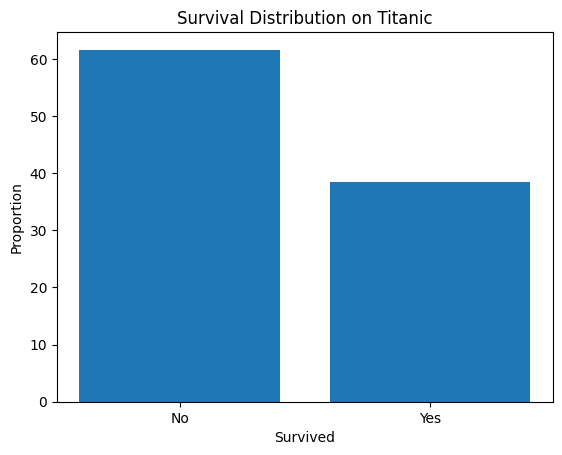

In [118]:
# Plot the distribution. What are the conclusions?
# Hints:
# plt.bar chart: https://pythonbasics.org/matplotlib-bar-chart/

plt.title('Survival Distribution on Titanic')
plt.xlabel('Survived')
plt.ylabel('Proportion')

plt.bar(
    ['No', 'Yes'],
    df_survived_distribution['proportion']
)

plt.show()

<Axes: title={'center': 'Survival Distribution on Titanic'}, xlabel='Survived', ylabel='Proportion'>

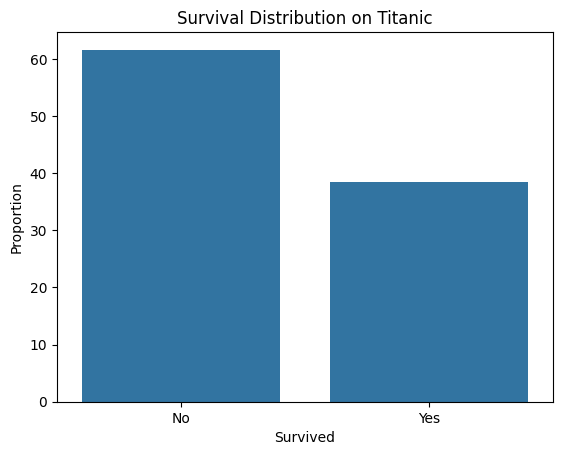

In [119]:
# The same could be done using seaborn
# sns.barplot: https://seaborn.pydata.org/generated/seaborn.barplot.html

# There are three parts:
# "data": this is the dataframe that holds the columns that need to be plotted
# "x": this is the data to be used on the x-axis (if string, then it refers to a column in "data")
# "y": this is the data to be used on the y-axis (if string, then it refers to a column in "data")

# The trailing ";" at end is used to hide printing of metainformation above the chart
# Compare the below output with the one in the following cell

plt.title('Survival Distribution on Titanic')
plt.xlabel('Survived')
plt.ylabel('Proportion')

sns.barplot(
    data=df_survived_distribution,
    x=['No', 'Yes'],
    y='proportion',
)

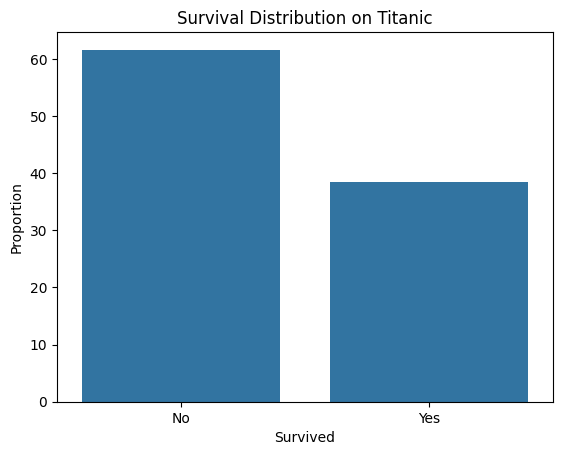

In [120]:
plt.title('Survival Distribution on Titanic')
plt.xlabel('Survived')
plt.ylabel('Proportion')

sns.barplot(data=df_survived_distribution, x=['No', 'Yes'], y='proportion');

In [121]:
df_gender_distribution = pd.concat([
    df_titanic['Gender'].value_counts(dropna=False),
    df_titanic['Gender'].value_counts(dropna=False, normalize=True).round(4) * 100,
], axis=1)
df_gender_distribution

,count,proportion
Gender,,
male,577,64.76
female,314,35.24


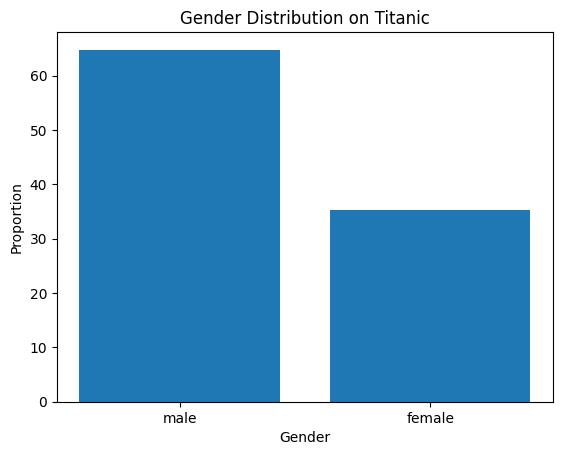

In [122]:
# Plot the distribution of the "Gender" column. What are the conclusions?
# Hints:
# plt.bar chart: https://pythonbasics.org/matplotlib-bar-chart/

plt.title('Gender Distribution on Titanic')
plt.xlabel('Gender')
plt.ylabel('Proportion')

plt.bar(
    df_gender_distribution.index,
    df_gender_distribution['proportion']
)

plt.show()

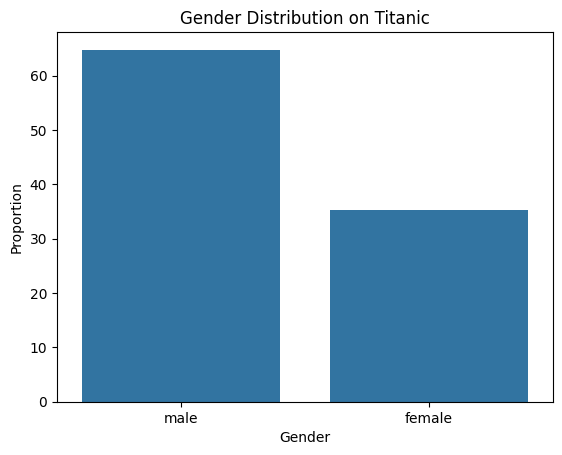

In [123]:
# Plot the same using seaborn
plt.title('Gender Distribution on Titanic')
plt.xlabel('Gender')
plt.ylabel('Proportion')

sns.barplot(data=df_gender_distribution, x=df_gender_distribution.index, y='proportion');

In [124]:
# Check the survival rate based on gender. What are the conclusions?
# Hint: pd.crosstab: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-crosstabulations

survived_x_gender = pd.crosstab(df_titanic['Survived'], df_titanic['Gender'], dropna=False, margins=True, normalize=True).T
survived_x_gender

Survived,0.0,1.0,All
Gender,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


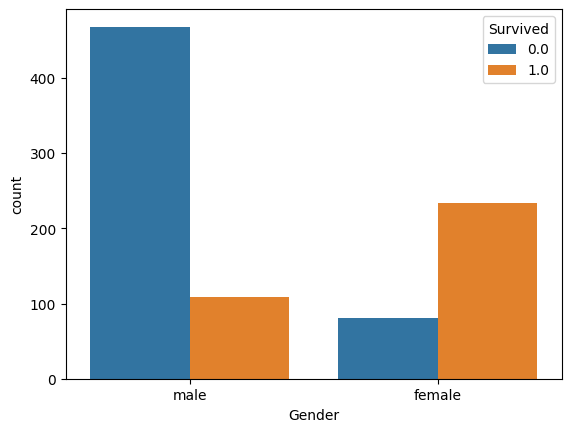

In [125]:
# Plot the survival rate based on gender. What are the conclusions?

sns.countplot(data=df_titanic, x='Gender', hue='Survived');

# Feature selection

## Mutual information

In [126]:
df_test = pd.DataFrame({
    'is_female': ['Yes', 'Yes', 'Yes', 'No', 'No'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test

,is_female,survived
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,No,No
4,No,Yes


In [127]:
df_test_always_yes_is_female = pd.DataFrame({
    'is_female': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test_always_yes_is_female

,is_female,survived
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,No
4,Yes,Yes


In [128]:
df_test_perfect_match = pd.DataFrame({
    'is_female': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test_perfect_match

,is_female,survived
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,No,No
4,Yes,Yes


In [129]:
df_test_opposite_match = pd.DataFrame({
    'is_female': ['No', 'No', 'No', 'Yes', 'No'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test_opposite_match

,is_female,survived
0,No,Yes
1,No,Yes
2,No,Yes
3,Yes,No
4,No,Yes


In [130]:
df_test_perfect_match_balanced_classes = pd.DataFrame({
    'is_female': ['Yes', 'No', 'Yes', 'No'],
    'survived': ['Yes', 'No', 'Yes', 'No'],
})
df_test_perfect_match_balanced_classes

,is_female,survived
0,Yes,Yes
1,No,No
2,Yes,Yes
3,No,No


In [131]:
df_test_opposite_match_balanced_classes = pd.DataFrame({
    'is_female': ['No', 'Yes', 'No', 'Yes'],
    'survived': ['Yes', 'No', 'Yes', 'No'],
})
df_test_opposite_match_balanced_classes

,is_female,survived
0,No,Yes
1,Yes,No
2,No,Yes
3,Yes,No


In [132]:
df_test_exact_match_balanced_classes_different_types = pd.DataFrame({
    'is_female': [0, 1, 0, 1],
    'survived': ['Yes', 'No', 'Yes', 'No'],
})
df_test_exact_match_balanced_classes_different_types

,is_female,survived
0,0,Yes
1,1,No
2,0,Yes
3,1,No


In [133]:
# Implement a function for calculating the mutual information
# Fill in missing values with the string 'NA' if such exist.

def mutual_information(df: pd.DataFrame, column_source: str, column_target: str) -> float:
    df = df.copy()
    df[column_source] = df[column_source].fillna('NA')
    
    df_crosstab = pd.crosstab(df[column_source], df[column_target], dropna=False, margins=True, normalize=True)
    values_column_source = df[column_source].unique()
    values_column_target = df[column_target].unique()
    
    mi = 0
    for x in values_column_source:
        for y in values_column_target:
            p_x_y = df_crosstab.at[x, y]
            p_x = df_crosstab.at[x, 'All']
            p_y = df_crosstab.at['All', y]
            
            if p_x_y != 0 and p_x != 0 and p_y != 0:
                mi += p_x_y * np.log2(p_x_y / (p_x * p_y))

    return mi

In [134]:
print(f"df_test => {mutual_information(df_test, 'is_female', 'survived')}")

# Why is MI zero here?
print(f"df_test_always_yes_is_female => {mutual_information(df_test_always_yes_is_female, 'is_female', 'survived')}")

# Note, that when the columns change in the exact same way
# or the exact opposite way
# the MI value does not change.
print(f"df_test_perfect_match => {mutual_information(df_test_perfect_match, 'is_female', 'survived')}")
print(f"df_test_opposite_match => {mutual_information(df_test_opposite_match, 'is_female', 'survived')}")

# And when we have perfect dependence the value is 1.
print(f"df_test_perfect_match_balanced_classes => {mutual_information(df_test_perfect_match_balanced_classes, 'is_female', 'survived')}")
print(f"df_test_opposite_match_balanced_classes => {mutual_information(df_test_opposite_match_balanced_classes, 'is_female', 'survived')}")
print(f"df_test_exact_match_balanced_classes_different_types => {mutual_information(df_test_exact_match_balanced_classes_different_types, 'is_female', 'survived')}")

df_test => 0.32192809488736224
df_test_always_yes_is_female => 0.0
df_test_perfect_match => 0.7219280948873621
df_test_opposite_match => 0.7219280948873621
df_test_perfect_match_balanced_classes => 1.0
df_test_opposite_match_balanced_classes => 1.0
df_test_exact_match_balanced_classes_different_types => 1.0


For all categorical variables, calculate their mutual information against the `Survived` column.

In [135]:
# See all categorical variables

df_titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked,split
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Train
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Train
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Train
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Train
4,"Allen, Mr. William Henry",male,373450,NaN,S,Train
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S,Train
887,"Graham, Miss. Margaret Edith",female,112053,B42,S,Train
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S,Train
889,"Behr, Mr. Karl Howell",male,111369,C148,C,Train


In [136]:
# Print the categorical values as a list
categorial_values = df_titanic.select_dtypes(include='object').columns.tolist()
categorial_values

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked', 'split']

In [137]:
# Notice how "Name" and "Ticket" have very high MI.
mis = [mutual_information(df_titanic, col, 'Survived') for col in categorial_values]
pd.Series(index=categorial_values, data=mis).sort_values(ascending=False)

Name        0.960708
Ticket      0.825937
Cabin       0.238386
Gender      0.217660
Embarked    0.024047
split       0.000000
dtype: float64

In [138]:
# Use the "mutual_info_classif" function to do a sanity check for the "Gender" column
mutual_info_classif(pd.DataFrame(df_titanic['Gender'].map({'male': 0, 'female': 1})), df_titanic['Survived'], discrete_features=True)

array([0.15087049])

## Chi-square Test

In [139]:
# Create such a dataframe
# that the following output matches

men_cat = [('men', 'cat') for _ in range(207)]
men_dog = [('men', 'dog') for _ in range(282)]
women_cat = [('women', 'cat') for _ in range(231)]
women_dog = [('women', 'dog') for _ in range(242)]

sers = []
for vals in [men_cat, men_dog, women_cat, women_dog]:
    idx, vals = zip(*vals)
    sers.append(pd.Series(idx, vals))

df_test = pd.concat(sers)
df_test = df_test.reset_index().rename(columns={'index': 'animal', 0: 'gender'})

In [140]:
pd.crosstab(df_test['gender'], df_test['animal'])

animal,cat,dog
gender,,
men,207,282
women,231,242


In [141]:
# Implement a function for performing the chi-square test.
# Fill in missing values with the string 'NA' if such exist.

def chi_square(df: pd.DataFrame, column_source: str, column_target: str) -> float:
    df = df.copy()
    
    df[column_source] = df[column_source].fillna('NA')
    
    df_crosstab = pd.crosstab(df[column_source], df[column_target], dropna=False, margins=True)
    
    values_column_source = df[column_source].unique()
    values_column_target = df[column_target].unique()
    
    chi_sq = 0
    
    for x in values_column_source:
        for y in values_column_target:
            subtr = df_crosstab.at[x, 'All'] * df_crosstab.at['All', y] / df_crosstab.at['All', 'All']
            chi_sq += (df_crosstab.at[x, y] - subtr)**2 / subtr

    degrees_of_freedom = (len(values_column_source) - 1) * (len(values_column_target) - 1)
    return 1 - scipy.stats.chi2.cdf(chi_sq, degrees_of_freedom)

chi_square(df_test, 'gender', 'animal')

0.04279386669738383

In [142]:
chi_sqs = [chi_square(df_titanic, col, 'Survived') for col in categorial_values]
pd.Series(index=categorial_values, data=chi_sqs).sort_values(ascending=False)

Name        0.484248
Ticket      0.011527
Embarked    0.000002
Cabin       0.000002
Gender      0.000000
split            NaN
dtype: float64

In [143]:
chi2(pd.DataFrame(df_titanic['Gender'].map({'male': 0, 'female': 1})), df_titanic['Survived'])

(array([170.34812709]), array([6.2105849e-39]))

## Apply to `chi-square test` on the `Age` column

Break it into three categories: `young`, `middle-aged`, `elder`.

In [144]:
df_titanic['age_binned'] = pd.cut(df_titanic['Age'], 3, labels=['young', 'middle-aged', 'elder']).astype(str)
df_titanic

/tmp/ipykernel_214324/1479116372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['age_binned'] = pd.cut(df_titanic['Age'], 3, labels=['young', 'middle-aged', 'elder']).astype(str)


,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split,Survived,age_binned
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,0.0,young
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,1.0,middle-aged
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,1.0,young
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,1.0,middle-aged
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,0.0,middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Train,0.0,middle-aged
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Train,1.0,young
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Train,0.0,nan
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Train,1.0,young


In [145]:
chi_square(df_titanic, 'age_binned', 'Survived')

0.025214851967762186

## Plot `age_binned` against `Survived`

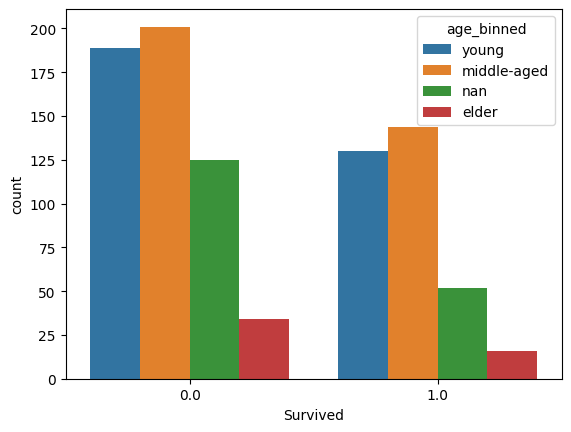

In [146]:
sns.countplot(data=df_titanic, x='Survived', hue='age_binned');